### Aim

The aim of this lab is to learn the Erdős–Rényi model of a random network.

### Objectives

At the end of this lab, students should be able to:
1. Generate Erdős–Rényi graphs from an adjacency matrix and directly
2. Calculate the clustering coefficient of a graph
3. Plot vertex degree histograms
4. Evaluate whether the Erdős–Rényi random network is a suitable model for a real network

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import itertools as it
# import time

from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Erdős–Rényi model

Random networks are used to model real-life networks, such as the Internet, Facebook, ad-hoc wireless networks etc. The simplest random network is the *Erdős–Rényi model*. It has two parameters, $n$ and $p$. In the Erdős–Rényi random graph $G(n,p)$, there are $n$ vertices and each pair of edges is connected with probability $p$.

Below is a slider animation of the Erdős–Rényi model. With a given value of $n$, moving the slider, you go over all pairs of nodes. Each time we add an edge joining the current pair of nodes with probability $p$. The current pair of nodes is highlighted with yellow.

You don't have to understand how this animation is implemented.

In [2]:
n = 20
p = 0.15

G = nx.empty_graph(n, nx.Graph())
list_of_graphs = [nx.Graph.copy(G)]

node_colors = ['red'] * n
node_color_list = [node_colors]

for x, y in it.combinations(np.arange(n), 2):
    if np.random.rand(1) < p:
        G.add_edge(x, y)
    list_of_graphs.append(nx.Graph.copy(G))
    new_colors = node_colors.copy()
    new_colors[x] = 'yellow'
    new_colors[y] = 'yellow'
    node_color_list.append(new_colors)

def plot_func(frame):
    nx.draw_circular(list_of_graphs[int(frame)], 
                     node_color = node_color_list[int(frame)],
                     with_labels = True)
    plt.show()

In [3]:
interact(plot_func, frame = widgets.Play(value=0,
                                         min=0,
                                         max=n * (n-1) // 2,
                                         step=1,
                                         description="Press play",
                                         disabled=False
))

interactive(children=(Play(value=0, description='Press play', max=190), Output()), _dom_classes=('widget-inter…

<function __main__.plot_func(frame)>

Below is the final result. Note that here we changed the plotting style.

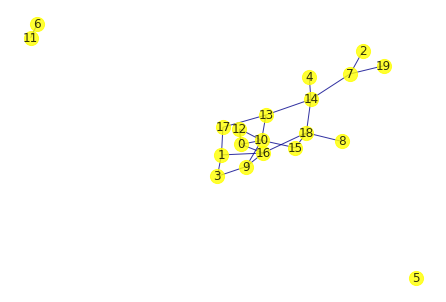

In [4]:
nx.draw(list_of_graphs[int(n * (n-1) / 2)], 
        node_size = 200, 
        node_color = 'yellow', 
        alpha = 0.8, 
        edge_color = 'darkblue', 
        with_labels = True)

plt.show()

## Histogram of vertex degrees

An important characteristic of a network is the distribution of vertex degrees. It can be visualized as a histogram.

[3, 3, 1, 2, 1, 0, 1, 3, 1, 3, 5, 1, 2, 3, 4, 2, 4, 2, 4, 1]


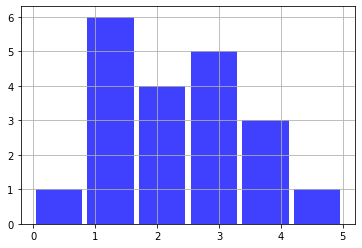

In [5]:
vertex_degrees = list(dict(nx.degree(G)).values())
print(vertex_degrees)
plt.hist(vertex_degrees, 
         bins = np.max(vertex_degrees) - np.min(vertex_degrees) + 1, 
         facecolor='blue', alpha=0.75, rwidth = 0.9)
plt.grid(True)
plt.show()

## Clustering coefficient

The *clustering coefficient* measures the degree to which vertices tend to cluster together. We shall first define the clustering coefficient of a vertex and then define the clustering coefficient of a graph to be the mean clustering coefficient of all its vertices.

For a given vertex $v$, the set of its *neighbours*, denoted by $N(v)$, consists of the vertices that are connecter to $v$ by an edge, or *adjacent* to $v$.

### Example

[[0 1 1 1 1 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 1 0]
 [1 0 0 1 0 1]
 [1 0 0 0 1 0]]


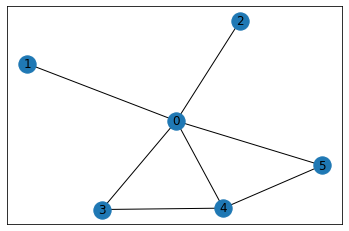

In [6]:
A = np.mat([[0, 1, 1, 1, 1, 1], 
          [1, 0, 0, 0, 0, 0], 
          [1, 0, 0, 0, 0, 0], 
          [1, 0, 0, 0, 1, 0], 
          [1, 0, 0, 1, 0, 1], 
          [1, 0, 0, 0, 1, 0]])
print(A)
G = nx.from_numpy_matrix(A)
nx.draw_networkx(G)
plt.show()

In the graph above, $N(4)=\{0,3,5\}$. Now we define the *clustering coefficient* of $v$, denoted by $cc(v)$, to be the number of connected pairs of vertices in $N(v)$ divided by the number of all pairs of vertices in $N(v)$. 

In the graph above, $N(4)$ has $3$ pairs of vertices - $\{0,3\}$, $\{0,5\}$, and $\{3,5\}$. Out of the three pairs, only two, $\{0,3\}$ and $\{0,5\}$, are connected by an edge. Hence $cc(4)=2/3.$

Similarly, we can calculate that $cc(0)=2/10=0.2.$

If the degree of $v$ is $0$ or $1$, the clustering coefficient of $v$ is $0$.

The clustering coefficient of the whole graph is the average clustering coefficient of all vertices. Below is the vector of clustering coefficients of all vertices of the graph $G$ and the average clustering coefficient.

In [7]:
clust_coefs = [0.2, 0, 0, 1, 2/3, 1]
print(clust_coefs)
np.mean(clust_coefs)

[0.2, 0, 0, 1, 0.6666666666666666, 1]


0.4777777777777778

Note that there is a native *networkx* function to compute clustering coefficients of all vertices

In [8]:
nx.clustering(G)

{0: 0.2, 1: 0, 2: 0, 3: 1.0, 4: 0.6666666666666666, 5: 1.0}

and the average clustering coefficient of the whole graph

In [9]:
nx.average_clustering(G)

0.4777777777777778

## Generating random matrices in Python

The library *numpy* provides tools for generating random samples from a variety of distributions. For example, below we generate a sample of 1000 standard normal random variables and plot its histogram

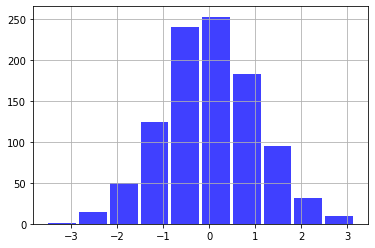

In [10]:
x = np.random.randn(1000)
plt.hist(x, facecolor='blue', alpha=0.75, rwidth = 0.9)
plt.grid(True)
plt.show()

It is possible to generate random matrices. For example, below we generate and print random matrix of size $6\times 4$ with coefficients uniformly distributed in the interval $[0,1]$:

In [11]:
x = np.random.rand(6, 4)
print(x)

[[0.35915684 0.51717999 0.06735168 0.60647707]
 [0.48382512 0.67581237 0.07719684 0.86274177]
 [0.59840174 0.97682439 0.56737508 0.53107151]
 [0.35575803 0.35789994 0.41685888 0.79720122]
 [0.74306237 0.12859375 0.6821832  0.27335186]
 [0.00216332 0.1689315  0.0097299  0.55926533]]


# Exercises

## Exercise 1

Write a short Python script that generates an $n\times n$ random symmetric matrix with zero diagonal and entries being Bernoulli random variables, i.e., each entry is $1$ with probability $p$ and $0$ with probability $1-p$. Your script should contain a few lines of code that only use *numpy* functions and no control statements, i.e., no loops, if-statements etc.

Note that such a matrix is the adjacency matrix of an Erdős–Rényi random graph.

## Solution

We will first generate a random matrix with entries uniformly distributed on the interval $[0,1]$. Then each value is less than $p$ with probability $p$. It means that the following matrix has Bernoulli random variables as entries:

In [12]:
1 * (np.random.rand(n, n) < p)

array([[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

It is, however, not symmetric and does not have a zero diagonal. In order to construct a symmetric matrix out of it, we will extract the upper triangular part from it and replace the lower triangular part with a copy of the upper triangular part. Here is the final answer (note that the required random matrix was generated in 2 lines of code):

In [13]:
A = np.triu(1 * (np.random.rand(n, n) < p), 1)
A = np.mat(A + A.T)
print(A)

[[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]


## Exercise 2

Given a simple graph $G$ with adjacency matrix $A$ write a short Python script that calculates clustering coefficients of all vertices of $G$ directly from the matrix $A$. Your script should contain a few lines of code that only use *numpy* functions and no control statements, i.e., no loops, if-statements etc.

Provide an explanation of how your code works

# Solution

For a vertex $v$, the number of pairs of neighbours is $\frac{\deg(v)\cdot(\deg(v)-1)}{2}$. The number of pairs of connected neighbours is simply the number of walks of length $3$ from $v$ back to $v$ divided by $2$ since for every pair $(i,j)$ of connected neighbours of $v$, there are precisely two walks of length $3$ from $v$ back to $v$, namely $v\rightarrow i\rightarrow j\rightarrow v$ and $v\rightarrow j\rightarrow i\rightarrow v$. 

Thus if $W_3(v)$ denotes the number of walks of length $3$ from $v$ back to $v$, we have the following formula:
$$cc(v)=\frac{\frac{W_3(v)}{2}}{\frac{\deg(v)\cdot(\deg(v)-1)}{2}}= \frac{W_3(v)}{\deg(v)\cdot(\deg(v)-1)}$$.

Finally, note that $W_3(v)$ are diagonal entries of $A^3$. Thus we get the following method to compute the clustering coefficient from the adjacency matrix. 

In [14]:
walks_of_length_3 = np.array(np.diag(A ** 3))
v_degrees = np.array(np.sum(A, 0))
num_of_pairs = v_degrees * (v_degrees - 1)
num_of_pairs[np.where(num_of_pairs == 0)] = 1
clust_coefs = walks_of_length_3 / num_of_pairs
print(clust_coefs)

[[0.         0.14285714 0.33333333 0.33333333 0.         0.
  0.         0.         0.33333333 0.         0.         0.
  0.         0.16666667 0.         0.         0.         0.
  0.5        0.33333333]]


Note that if $\deg v$ is 0 or 1, then $W_3(v)=0$ and $cc(v)=0$. That's why we replaced 0 with 1 in `num_of_pairs` - it will prevent the compiler from computing 0/0.

## Exercise 3

Construct an Erdős–Rényi random graph with $n=300$ and $p=0.1$, plot it and find its clustering coefficient. What do you think the clustering coefficient of an Erdős–Rényi random graph with $n$ vertices and probability of an edge $p$ is expected to be? Provide a short explanation.

## Solution

Note that there is a native *networkx* function for generating an Erdős–Rényi random graph. Below we construct such a graph with $n=300$ and $p=0.1$. Then we plot it nicely and calculate the clustering coefficient.

0.09998466342076492


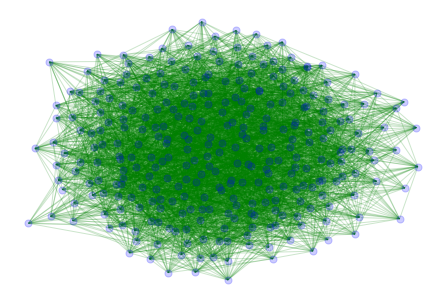

In [15]:
G = nx.erdos_renyi_graph(300, 0.1)
print(nx.average_clustering(G))
nx.draw(G, node_size = 50, node_color = 'blue', alpha = 0.2, edge_color = 'green')
plt.show()

The average clustering coefficient is expected to be $p$. Indeed, the clustering coefficient of a vertex $k$ is the probability that vertices $i$ and $j$ are connected given that both $i$ and $j$ are connected to $k$. However, the probability that an edge occurs in the Erdős–Rényi  graph is independent of other edges, i.e., it is just $p$.

## Exercise 4

Plot the histogram of vertex degrees of Erdős–Rényi graph. What is the distribution of vertex degrees?

## Solution

Below we plot the histogram

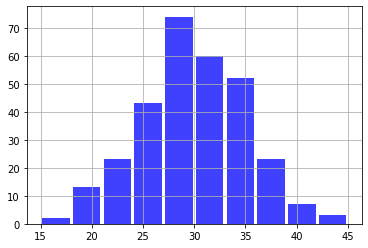

In [16]:
vertex_degrees = list(dict(nx.degree(G)).values())
plt.hist(vertex_degrees, 
         facecolor='blue', alpha=0.75, rwidth = 0.9)
plt.grid(True)
plt.show()

The distribution is binomial. Indeed, the degree of a vertex is the sum of entries of the adjacency matrix in one column. But entries of the adjacency matrix follow the Bernoulli distribution. The sum of independent Bernoulli variables follows the binomial distribution (it's the definition of a binomial distribution).

## Exercise 5

Networks often appear in real life. Since understanding their properties is important for practical applications and since often the true structure of a network is not known (e.g., Instagram), one can try to construct a random network that resembles the real one. 

Here we will explore how well a real network where nodes are employees of some department joined by an edge whenever there was at least one email sent between them can be approximated with an Erdős–Rényi graph random graph. 

The network is downloaded from the Stanford Large Network Dataset Collection. Note that what you work with here is a simplification as the actual network is a directed temporal multi-graph, i.e., there may be more then one edge from $i$ to $j$, edges are directed and each edge has a timestamp.
You can find the raw data here:

<https://snap.stanford.edu/data/email-Eu-core-temporal.html>

In today's lab we will be dealing with a simplified version of this network represented by its adjacency matrix. The adjacency matrix is stored in the document "email.txt" that you download from NTULearn. First, let's load the matrix into Python

In [17]:
A = np.loadtxt("email_lab_5.txt")
print(A[:10, :10])

[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 0. 0. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]


Now create a graph $G$ from the matrix `A` and plot it. How many vertices does it have? How many edges? How many connected components? What is its average clustering coefficient? Plot the histogram of its vertex degrees.

If the graph $G$ were an Erdős–Rényi random graph, what would be the most likely values of $n$ and $p$?

Note that the histogram of vertex degrees and the clustering coefficient of the actual graph $G$ are nothing like the histogram of vertex degrees and the clustering coefficient of an Erdős–Rényi random graph. Why do you think is it so? 

## Solution

Below we create the graph $G$, plot it and find the number of vertices and edges

|V| =  162
|E| =  1045


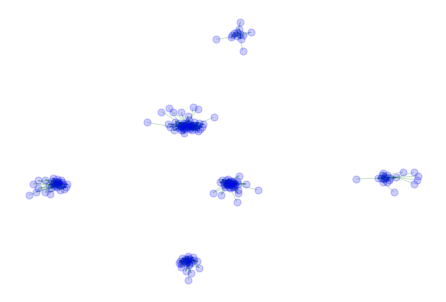

In [18]:
G = nx.Graph(A)

print('|V| = ', nx.number_of_nodes(G))
print('|E| = ', nx.number_of_edges(G))

nx.draw(G, node_size = 50, node_color = 'blue', 
        alpha = 0.2, edge_color = 'green')
plt.show()

We can see that there are 6 connected components. At the same time, this can be confirmed by a *networkx* command

In [19]:
print("Num components = ", nx.number_connected_components(G))

Num components =  6


In the Erdős–Rényi model, $n$ is the number of vertices, i.e., $n=162$. The probability $p$ should be the number of actual edges divided by the maximum possible number of edges $\binom{n}{2}$. Thus, we get

In [20]:
print('p = ', nx.number_of_edges(G) / 
      (0.5 * nx.number_of_nodes(G) * (nx.number_of_nodes(G) - 1)))

p =  0.08013189172609463


The clustering coefficient is

In [21]:
print("CC = ", nx.average_clustering(G))

CC =  0.7257979348202142


Note that it is much higher than the expected clustering coefficient of an Erdős–Rényi graph, which is just $p$. The reason is because in real life if two people exchange emails with a third person, then they are likely to work together and, if they work together, there is a high chance that they exchange emails between themselves.

You can think of it as follows: the chance that random people A and B are friends is small, but the chance that A and B are friends given that both of them are friends with C is much higher.

Now let's look at the histogram of vertex degrees

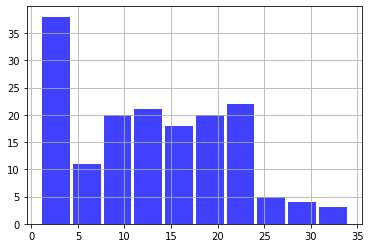

In [22]:
vertex_degrees = list(dict(nx.degree(G)).values())
plt.hist(vertex_degrees, 
         facecolor='blue', alpha=0.75, rwidth = 0.9)
plt.grid(True)
plt.show()

It doesn't look like a binomial distribution at all. The reason is that in real life most people don't exchange emails with a lot of colleagues but there are a few highly connected people, like admin staff. On the contrary, the binomial distribution of the Erdős–Rényi graph is pretty much concentrated around the mean.

# Conclusion

In today's lab, we covered some material familiar from Probability (Bernoulli variables, binomial distribution, histograms) and some new material (the Erdős–Rényi random network). We have learned how to load data from a text file into Python.

The main takeaway is that the Erdős–Rényi random graph is a very poor model for real social networks because it does not capture important characteristics of real social networks - high clustering and highly skewed vertex degree distribution.